# Para esta tarea
Generar un archivo tipo Notebook de Python que contenga el código fuente:
- Uso de librería Pandas para leer un archivo (fifa_eda.csv) 
- Mostrar las primeras 20 filas del archivo, las últimas 5 y un sample de 10
- Generar data estadística con .describe() y además los tipos de datos del dataset
- Si es necesario, pasar a numéricas por lo menos 2 columnas que contengan números para incluirlas en .describe(). Aplicar las técnicas aprendidas.
- Añadir una columna “Years Playing”, que calcule el año actual menos la columna “Joined”
- Buscar y mostrar a todos los jugadores de Mexico
- Ordenar y mostrar los datos por la columna ReleaseClause (sueldo)
- Generar un nuevo dataset que contenga el año (joined) y el número de jugadores (groupby)

❖Opcional❖: Generar un gráfico que contenga, por año, el número de jugadores


## Importacion de librerias

In [79]:
import pandas as pd
import numpy as np

## Lectura del archivo csv

In [ ]:
df = pd.read_csv("../../Archivos-Analisis/files-tarea-m30/fifa_eda.csv")
df

### Obtencion de los primeros 20 registros

In [ ]:
df.head(20)

### Obtencion de los ultimos 5 registros

In [ ]:
df.tail(5)

### Obtencion de 10 registros randoms registros

In [ ]:
df.sample(10)

## Data estadistica

In [86]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


### Tipos de datos por columnas

In [87]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

## Eliminacion de valores nulos

In [88]:
# Identificamos valores nulos
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [89]:
df[df.isnull().any(axis=1)] 

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
452,207439,L. Paredes,24,Argentina,80,85,NaN,NaN,0.0,Right,2.0,4.0,CM,2016,NaN,5.916667,165.0,4585.060806
538,156713,A. Granqvist,33,Sweden,80,80,NaN,NaN,0.0,Right,2.0,2.0,LCB,2016,NaN,6.333333,185.0,4585.060806
568,229909,A. Lunev,26,Russia,79,81,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaN,6.166667,176.0,4585.060806
677,187347,I. Smolnikov,29,Russia,79,79,NaN,NaN,0.0,Right,2.0,3.0,RB,2016,NaN,5.833333,154.0,4585.060806
864,153260,Hilton,40,Brazil,78,78,Montpellier HSC,NaN,18.0,Right,2.0,3.0,CB,2011,2019-01-01,5.916667,172.0,4585.060806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,234508,C. Singh,21,India,53,62,NaN,NaN,0.0,Right,1.0,2.0,LB,2016,NaN,6.250000,174.0,4585.060806
17672,237744,R. Kawai,39,Japan,53,53,Hokkaido Consadole Sapporo,NaN,1.0,Right,1.0,2.0,CB,2011,2021-01-01,6.000000,165.0,4585.060806
17726,51963,T. Warner,44,Trinidad & Tobago,53,53,Accrington Stanley,NaN,1.0,Right,1.0,1.0,GK,2018,2019-01-01,6.333333,185.0,4585.060806
17752,100899,S. Phillips,40,England,52,52,Yeovil Town,NaN,1.0,Right,1.0,1.0,GK,2017,2022-01-01,6.083333,165.0,4585.060806


In [90]:
# Eliminamos todas las filas con las que se cuente con al menos un valor nulo
df.dropna(inplace=True) 

In [91]:
# Comprobamos
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [92]:
# Contamos los valroes totales actuales
df.shape

(17907, 18)

## Conversion de 2 columnas a tipo numericas

In [93]:
# La practica requeire pasar a tipo numerico dos columnas, si embargo, el df cuenta con todas las columnas asignadas correctamente
# Para este caso, cambairemos algunas columnas de tipo float a int, ya que no cuentan con decimales para manejarlas como float
# Recordemos que los tipo float son datos mas pesados a comparacion de un int
df[["International Reputation", "Skill Moves", "Release Clause", "Wage"]] = df[["International Reputation", "Skill Moves", "Release Clause", "Wage"]].astype(int)

In [95]:
# Comprobamos el cambio
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                          int64
Preferred Foot               object
International Reputation      int64
Skill Moves                   int64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause                int64
dtype: object

## Agregacion de la columna "Years Playing"

In [97]:
# Creacion de la columna con el calculo de años jugados
df["Years Playing"] = pd.Timestamp.now().year - df["Joined"]

In [ ]:
# Corroboramos
df

## DF de los jugadores de Mexico

In [102]:
df_mexico= df.loc[df["Nationality"] == "Mexico"].sort_values(by="Name")
df_mexico

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Years Playing
9153,198740,A. Acosta,30,Mexico,66,66,Tigres U.A.N.L.,475.0,13,Left,1,3,LB,2010,2022-01-01,5.583333,157.0,760,15
9821,230125,A. Acosta,21,Mexico,66,78,U.N.A.M.,1200.0,5,Right,1,3,RM,2017,2021-01-01,5.666667,161.0,2200,8
6025,167532,A. Aldrete,30,Mexico,69,69,Cruz Azul,750.0,11,Left,1,3,LB,2016,2023-01-01,5.833333,165.0,1300,9
7926,237890,A. Arellano,23,Mexico,67,73,Querétaro,900.0,3,Right,1,3,CDM,2017,2019-01-01,5.750000,141.0,1700,8
6356,183743,A. Blanco,30,Mexico,69,69,Pachuca,675.0,10,Left,1,1,GK,2011,2021-01-01,6.000000,201.0,1100,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11891,244952,V. Loroña,19,Mexico,64,80,Puebla FC,875.0,1,Right,1,2,RWB,2015,2021-01-01,5.916667,165.0,2000,10
11271,212543,V. Milke,23,Mexico,64,72,Querétaro,575.0,2,Left,1,2,CB,2013,2023-01-01,6.000000,159.0,1100,12
15298,231422,V. Rodríguez,23,Mexico,60,69,Club América,325.0,7,Right,1,2,RM,2018,2023-01-01,5.333333,141.0,618,7
5534,200671,V. Ulloa,26,Mexico,70,71,FC Dallas,1700.0,5,Right,1,3,LDM,2014,2018-01-01,6.000000,165.0,2700,11


## Orden por sueldos

In [106]:
df_mexico[["Name", "Age", "Nationality", "Joined", "Release Clause", "Years Playing"]].sort_values(by="Release Clause", ascending=False)

,Name,Age,Nationality,Joined,Release Clause,Years Playing
371,J. Corona,25,Mexico,2015,44600,10
306,A. Guardado,31,Mexico,2017,39900,8
329,H. Lozano,22,Mexico,2017,35400,8
406,H. Herrera,28,Mexico,2013,35000,12
397,C. Vela,29,Mexico,2018,26300,7
...,...,...,...,...,...,...
18037,C. Landa,19,Mexico,2018,93,7
18068,J. García,20,Mexico,2017,76,8
18113,R. Pasquel,22,Mexico,2017,76,8
9689,L. Michel,38,Mexico,2018,68,7


## Dataset nuevo con el año de ingreso y el numero de jugadores

In [116]:
df_x_year = df.groupby("Joined").count()["ID"]
df_x_year

Joined
1991       1
1998       3
1999       1
2000       2
2001       2
2002       8
2003      13
2004      12
2005      17
2006      18
2007      38
2008      53
2009      78
2010     131
2011     199
2012     339
2013     458
2014     818
2015    1336
2016    3509
2017    4305
2018    6566
Name: ID, dtype: int64

## Generacion de grafico

<Axes: xlabel='Joined'>

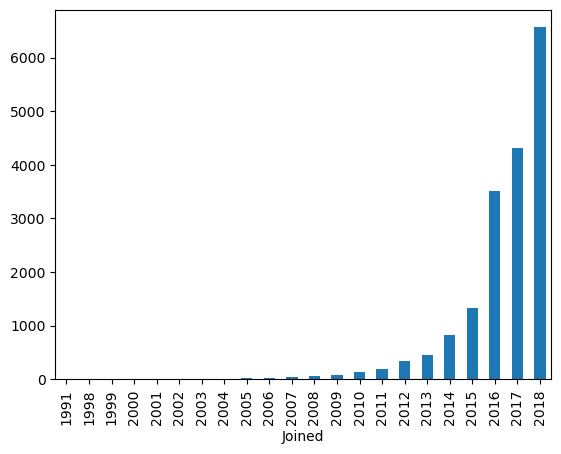

In [121]:
df_x_year.plot.bar()